In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import fashion_mnist

In [ ]:
(X_t, Y_t), (X_test, Y_test) = fashion_mnist.load_data()

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = [28, 28]))
model.add(keras.layers.Dense(300, activation = 'relu'))
model.add(keras.layers.Dense(100, activation= 'relu'))
model.add(keras.layers.Dense(10, activation='softmax'))


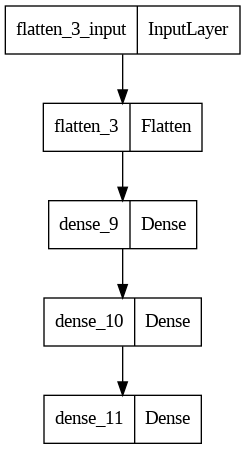

In [ ]:
keras.utils.plot_model(model)

In [ ]:
X_t = keras.utils.normalize(X_t, axis = 1)
X_test = keras.utils.normalize(X_test, axis = 1)
print(X_t.shape)

(60000, 28, 28)


In [ ]:
model.layers

X_valid, X_train = X_t[:5000], X_t[5000:]
Y_valid, Y_train = Y_t[:5000], Y_t[5000:]

In [ ]:
print(X_train.shape)
print(X_valid.shape)

(55000, 28, 28)
(5000, 28, 28)


In [ ]:
weights = model.get_weights()
model.compile(loss = "sparse_categorical_crossentropy", optimizer = "sgd", metrics = ["accuracy"])
history = model.fit(X_train, Y_train, epochs = 50, validation_data = (X_valid, Y_valid))

Epoch 1/50
1719/1719 [==============================] - 10s 5ms/step - loss: 0.2635 - accuracy: 0.9041 - val_loss: 0.3086 - val_accuracy: 0.8852
Epoch 2/50
1719/1719 [==============================] - 8s 4ms/step - loss: 0.2601 - accuracy: 0.9061 - val_loss: 0.3121 - val_accuracy: 0.8890
Epoch 3/50
1719/1719 [==============================] - 10s 6ms/step - loss: 0.2571 - accuracy: 0.9063 - val_loss: 0.3124 - val_accuracy: 0.8876
Epoch 4/50
1719/1719 [==============================] - 10s 6ms/step - loss: 0.2538 - accuracy: 0.9081 - val_loss: 0.3038 - val_accuracy: 0.8898
Epoch 5/50
1719/1719 [==============================] - 9s 5ms/step - loss: 0.2505 - accuracy: 0.9091 - val_loss: 0.3017 - val_accuracy: 0.8922
Epoch 6/50
1719/1719 [==============================] - 9s 5ms/step - loss: 0.2468 - accuracy: 0.9110 - val_loss: 0.3050 - val_accuracy: 0.8874
Epoch 7/50
1719/1719 [==============================] - 9s 5ms/step - loss: 0.2444 - accuracy: 0.9117 - val_loss: 0.3172 - val_accura

<Axes: >

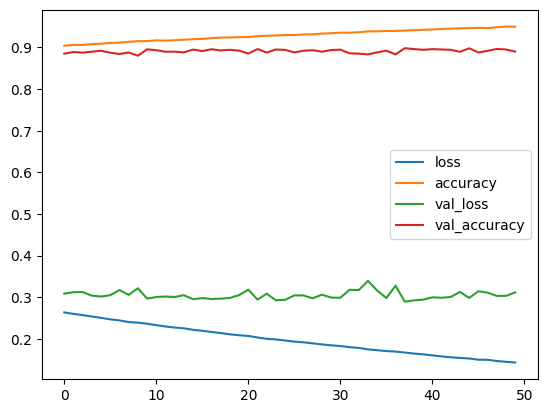

In [ ]:
import pandas as pd
pd.DataFrame(history.history).plot()

In [ ]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3434 - accuracy: 0.8850


[0.343433141708374, 0.8849999904632568]

In [ ]:
Y_proba = model.predict(X_test[:10])
print(Y_proba.round(2))

1/1 [==============================] - 0s 27ms/step
[[0.   0.   0.   0.   0.   0.   0.   0.   0.   1.  ]
 [0.   0.   0.99 0.   0.01 0.   0.   0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.29 0.   0.   0.   0.01 0.   0.7  0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.01 0.   0.99 0.   0.   0.   0.   0.  ]
 [0.   0.   0.01 0.   0.   0.   0.99 0.   0.   0.  ]
 [0.   0.   0.   0.   0.   1.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   1.   0.   0.  ]]


In [ ]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Shirt", "Coat",
               "Sandal", "Sneaker", "Bag", "Ankle boot", "Boot"]

print(class_names[Y_train[0]])


Coat


In [ ]:
import numpy as np
Y_pred = np.argmax(Y_proba, axis = 1)
print (Y_pred)

[9 2 1 1 6 1 4 6 5 7]


In [ ]:
np.array(class_names)[Y_pred]

array(['Boot', 'Pullover', 'Trouser', 'Trouser', 'Sneaker', 'Trouser',
       'Coat', 'Sneaker', 'Sandal', 'Bag'], dtype='<U11')

(-0.5, 27.5, 27.5, -0.5)

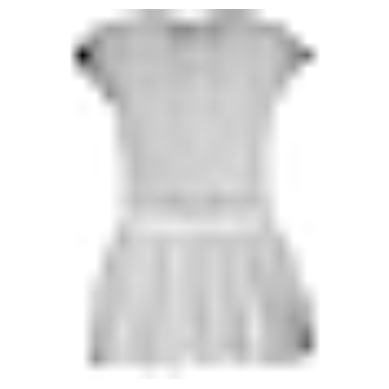

In [ ]:
import matplotlib.pyplot as plt
some = X_t[3]
plt.imshow(some, cmap = 'binary', interpolation = 'bilinear')
plt.axis("off")

In [ ]:
Y_test[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=uint8)

In [ ]:
np.array(class_names)[Y_test[:10]]

array(['Boot', 'Pullover', 'Trouser', 'Trouser', 'Sneaker', 'Trouser',
       'Coat', 'Sneaker', 'Sandal', 'Bag'], dtype='<U11')